<a href="https://colab.research.google.com/github/bri-thetechie/cnn-waste-sorter/blob/src/Preprocessing_CNN_WC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

base_dir = "/content/drive/MyDrive/NNDL"  # change <waste_dataset> to your folder name
categories = ["E-Waste", "Dry waste", "Wet waste"]

# check
for cat in categories:
    print(os.path.join(base_dir, cat), " -> ", len(os.listdir(os.path.join(base_dir, cat))), "images")


/content/drive/MyDrive/NNDL/E-Waste  ->  40 images
/content/drive/MyDrive/NNDL/Dry waste  ->  40 images
/content/drive/MyDrive/NNDL/Wet waste  ->  40 images


In [ ]:
import os
from PIL import Image
from collections import Counter

base_dir = "/content/drive/MyDrive/NNDL"
categories = ["E-Waste", "Dry waste", "Wet waste"]

for cat in categories:
    folder_path = os.path.join(base_dir, cat)
    sizes = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            with Image.open(img_path) as img:
                sizes.append(img.size)  # (width, height)
        except:
            print(f"Could not open {img_path}")

    # Count how many unique sizes there are
    size_counts = Counter(sizes)
    print(f"\n{cat}: {len(os.listdir(folder_path))} images")
    for size, count in size_counts.items():
        print(f"   {size} -> {count} images")



E-Waste: 40 images
   (4080, 2296) -> 22 images
   (8160, 4592) -> 18 images

Dry waste: 40 images
   (4080, 2296) -> 20 images
   (8160, 4592) -> 20 images

Wet waste: 40 images
   (4080, 2296) -> 32 images
   (1200, 1600) -> 3 images
   (750, 965) -> 1 images
   (1957, 603) -> 1 images
   (1080, 2340) -> 3 images


Image counts: {'E-Waste': 40, 'Dry waste': 40, 'Wet waste': 40}


/tmp/ipython-input-552171477.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")


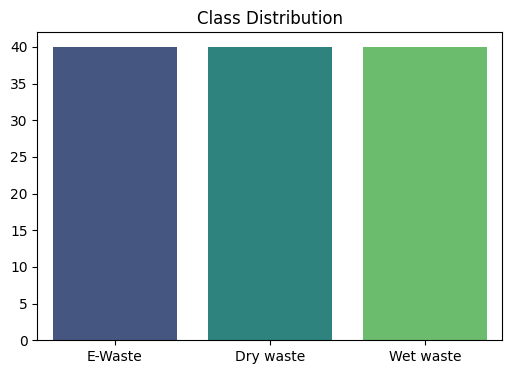

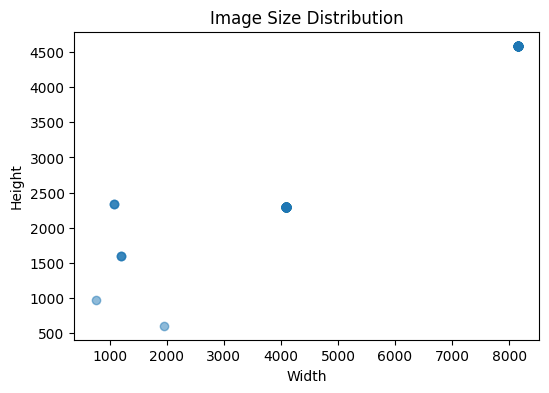

Unique sizes found: Counter({(np.int64(4080), np.int64(2296)): 74, (np.int64(8160), np.int64(4592)): 38, (np.int64(1200), np.int64(1600)): 3, (np.int64(1080), np.int64(2340)): 3, (np.int64(750), np.int64(965)): 1, (np.int64(1957), np.int64(603)): 1})


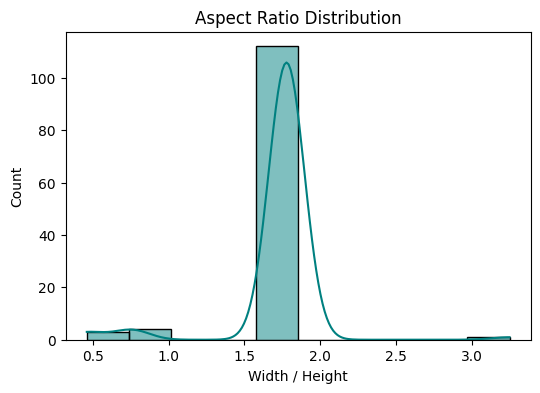

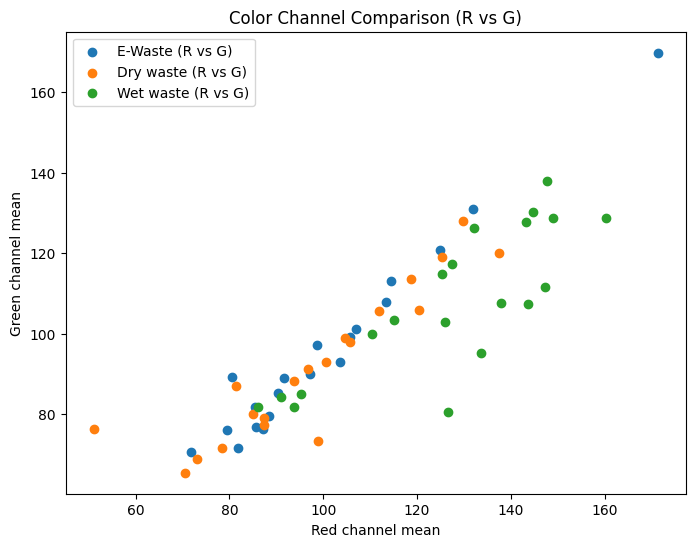

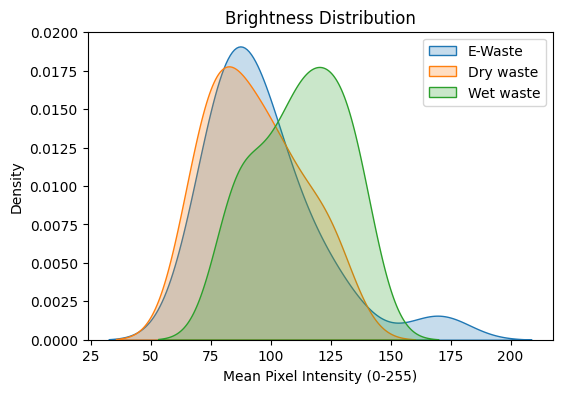

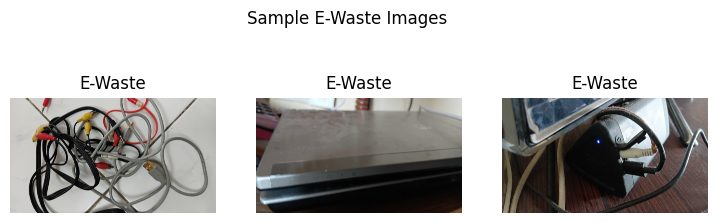

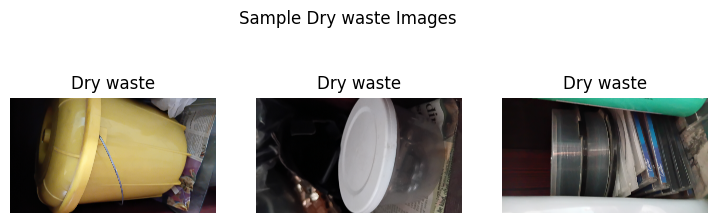

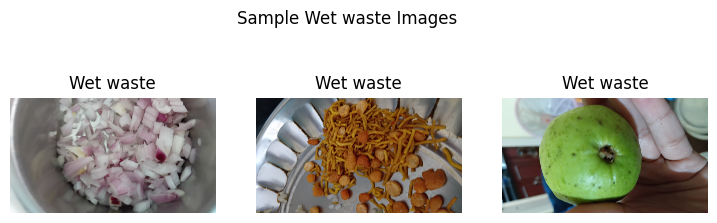

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from PIL import Image

# Final dataset path
data_dir = "/content/drive/MyDrive/NNDL"
categories = ["E-Waste", "Dry waste", "Wet waste"]

# 1. Count images per category
counts = {cat: len(os.listdir(os.path.join(data_dir, cat))) for cat in categories}
print("Image counts:", counts)

# Plot class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")
plt.title("Class Distribution")
plt.show()

# 2. Analyze image sizes (width, height)
sizes = []
for cat in categories:
    folder = os.path.join(data_dir, cat)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        try:
            img = Image.open(img_path)
            sizes.append(img.size)  # (width, height)
        except:
            continue

sizes = np.array(sizes)
plt.figure(figsize=(6,4))
plt.scatter(sizes[:,0], sizes[:,1], alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Size Distribution")
plt.show()

print("Unique sizes found:", Counter([tuple(s) for s in sizes]))

# 3. Aspect ratio distribution
aspect_ratios = [w/h for w,h in sizes]
plt.figure(figsize=(6,4))
sns.histplot(aspect_ratios, bins=10, kde=True, color="teal")
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.show()

# 4. RGB channel analysis
def get_channel_means(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img.mean(axis=(0,1))  # mean for R,G,B

channel_means = {cat: [] for cat in categories}
for cat in categories:
    folder = os.path.join(data_dir, cat)
    for img_name in os.listdir(folder)[:20]:  # sample 20 per class
        img_path = os.path.join(folder, img_name)
        try:
            channel_means[cat].append(get_channel_means(img_path))
        except:
            continue

plt.figure(figsize=(8,6))
for cat in categories:
    means = np.array(channel_means[cat])
    plt.scatter(means[:,0], means[:,1], label=f"{cat} (R vs G)")
plt.xlabel("Red channel mean")
plt.ylabel("Green channel mean")
plt.legend()
plt.title("Color Channel Comparison (R vs G)")
plt.show()

# 5. Brightness distribution
brightness = {cat: [] for cat in categories}
for cat in categories:
    folder = os.path.join(data_dir, cat)
    for img_name in os.listdir(folder)[:20]:
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        brightness[cat].append(img.mean())

plt.figure(figsize=(6,4))
for cat in categories:
    sns.kdeplot(brightness[cat], label=cat, fill=True)
plt.title("Brightness Distribution")
plt.xlabel("Mean Pixel Intensity (0-255)")
plt.legend()
plt.show()

# 6. Show some random images from each class
for cat in categories:
    folder = os.path.join(data_dir, cat)
    sample_imgs = np.random.choice(os.listdir(folder), 3, replace=False)
    plt.figure(figsize=(9,3))
    for i, img_name in enumerate(sample_imgs):
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        plt.subplot(1,3,i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(cat)
    plt.suptitle(f"Sample {cat} Images")
    plt.show()


In [ ]:
import os
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np

# Input directory (original dataset)
input_dir = "/content/drive/MyDrive/NNDL"
# Temporary augmented storage
temp_dir = "/content/drive/MyDrive/NNDL_temp"
# Final output directory with exactly 200/category
output_dir = "/content/drive/MyDrive/NNDL_final"

categories = ["E-Waste", "Dry waste", "Wet waste"]

# Balanced, EDA results backed augmentation
augmentation_settings = {
    "E-Waste": ImageDataGenerator(
        rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
        zoom_range=0.2, brightness_range=[0.7, 1.3],
        horizontal_flip=True, vertical_flip=True, fill_mode='nearest'
    ),
    "Dry waste": ImageDataGenerator(
        rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
        zoom_range=0.2, brightness_range=[0.8, 1.2],
        horizontal_flip=True, vertical_flip=True, fill_mode='nearest'
    ),
    "Wet waste": ImageDataGenerator(
        rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
        zoom_range=0.2, brightness_range=[0.8, 1.2],
        horizontal_flip=True, vertical_flip=True, fill_mode='nearest'
    )
}

# Step 1: Generate augmentations in a temp dir
os.makedirs(temp_dir, exist_ok=True)
for category in categories:
    in_path = os.path.join(input_dir, category)
    temp_path = os.path.join(temp_dir, category)
    os.makedirs(temp_path, exist_ok=True)

    datagen = augmentation_settings[category]
    images = os.listdir(in_path)

    for img_name in images:
        img_path = os.path.join(in_path, img_name)
        try:
            img = load_img(img_path, target_size=(128, 128))
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            # Generate a few augmentations per original
            i = 0
            for batch in datagen.flow(
                x, batch_size=1, save_to_dir=temp_path,
                save_prefix=img_name.split('.')[0], save_format="jpg"
            ):
                i += 1
                if i >= 5:  # generate 5 augments per original
                    break
        except Exception as e:
            print(f"Error with {img_path}: {e}")

# Step 2: Build final set with ALL originals + 80 augments
os.makedirs(output_dir, exist_ok=True)
for category in categories:
    in_path = os.path.join(input_dir, category)
    temp_path = os.path.join(temp_dir, category)
    out_path = os.path.join(output_dir, category)
    os.makedirs(out_path, exist_ok=True)

    # Copy all originals first
    originals = os.listdir(in_path)
    for img_name in originals:
        shutil.copy(os.path.join(in_path, img_name), os.path.join(out_path, f"orig_{img_name}"))

    # Randomly sample 160 augmented images
    augments = os.listdir(temp_path)
    selected = random.sample(augments, 160)
    for img_name in selected:
        shutil.copy(os.path.join(temp_path, img_name), os.path.join(out_path, img_name))

    print(f"{category}: Final count = {len(os.listdir(out_path))}")

print("Category-specific augmentation complete! Each category has 200 images (all 40 originals + 160 augments).")


E-Waste: Final count = 200
Dry waste: Final count = 200
Wet waste: Final count = 200
Category-specific augmentation complete! Each category has 200 images (all 40 originals + 160 augments).


In [ ]:
import os
from PIL import Image
from collections import Counter

base_dir = "/content/drive/MyDrive/NNDL_final"
categories = ["E-Waste", "Dry waste", "Wet waste"]

for cat in categories:
    folder_path = os.path.join(base_dir, cat)
    sizes = []
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            with Image.open(img_path) as img:
                sizes.append(img.size)  # (width, height)
        except:
            print(f"Could not open {img_path}")

    # Count how many unique sizes there are
    size_counts = Counter(sizes)
    print(f"\n{cat}: {len(os.listdir(folder_path))} images")
    for size, count in size_counts.items():
        print(f"   {size} -> {count} images")



E-Waste: 200 images
   (4080, 2296) -> 22 images
   (8160, 4592) -> 18 images
   (128, 128) -> 160 images

Dry waste: 200 images
   (4080, 2296) -> 20 images
   (8160, 4592) -> 20 images
   (128, 128) -> 160 images

Wet waste: 200 images
   (4080, 2296) -> 32 images
   (1200, 1600) -> 3 images
   (750, 965) -> 1 images
   (1957, 603) -> 1 images
   (1080, 2340) -> 3 images
   (128, 128) -> 160 images
